# Donor match

In this notebook, we align donors (after running `cellSNP` and `vireo` without any genotype) by their genotypes. Here we are aligning the donor genotypes estimated with vireo from the scRNA-seq data. The idea is that we align the donors with giving least genotype difference, either using categorical genotype value or genotype probability.

To do so 

1. First run cellSNP to genotype the barcodes in the scRNA-seq libaries and make a .vcf file with the varians in their reads (CellGen can do this for you, is computational expensive):

```
cellSNP -s sample.bam -b sample.barcodes.tsv -o out.sample.cellsnp -R genome1K.phase3.SNP_AF5e2.chr1toX.hg38.vcf.gz -p 6 --minMAF 0.1 --minCOUNT 20
```

> Find `genome1K.phase3.SNP_AF5e2.chr1toX.hg38.vcf.gz` here https://sourceforge.net/projects/cellsnp/files/SNPlist/

2. Next run vireo without any genotype. This uses the SNPs in the previous step to classify scRNA-seq barcodes and the variants into `N` donors, and generate a .vcf with the variants of each donor:

```
vireo -c sample/cellSNP-out/ -N 2 -o out/sample/ -t GT
```

3. Use the code below will link the donor's genotype from step 2 (i.e. donors and genotypes estimated from scRNA-seq).


In [1]:
from os.path import exists
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vireoSNP
print("vireoSNP version: %s" %vireoSNP.__version__)


def getdataframe(res, library_id):
    # What to make the function do
    
    df = pd.DataFrame(res['matched_GPb_diff'],
                 index=res['matched_donors1'],
                 columns=res['matched_donors2'])
    df['Patient'] = df.index
    df['library'] = library_id
    results = pd.melt(df, id_vars = ['Patient', 'library'])
    return results


def match_donors(scRNAseq_libraries, genotype_vcf):
    for library_id in scRNAseq_libraries:
#         print(library_id)


        # Link donors
        res = vireoSNP.vcf.match_VCF_samples('/home/jovyan/vireo/out_novcf/'+library_id+'/GT_donors.vireo.vcf.gz', 
                                              genotype_vcf,
                                             GT_tag1 = 'GT', GT_tag2='GT')


        # Save data frame
        results = getdataframe(res, library_id)
        results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


        # Plot
        fig = plt.figure()
        vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
                                  res['matched_donors1'] , 
                                  res['matched_donors2'] )
        plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
        plt.tight_layout()
        plt.show()

        fig = plt.figure()
        vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
                                  res['matched_donors1'] , 
                                  res['matched_donors2'] )
        plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
        plt.tight_layout()
        plt.show()

vireoSNP version: 0.5.8


In [2]:
# match_donors(scRNAseq_libraries=['UA_Endo12680033', 'UA_Endo12680034'],
#              genotype_vcf='/nfs/users/nfs_l/lg18/team292/lg18/endometriosis/data/genotypes/sample_specific_filtered/all_for_nuclei_deconvolution.renamed.fixed.vcf')

# Donor FX9006 - lib UA_Endo12865961

Shape for Geno Prob in VCF1: (161548, 2, 3)
Shape for Geno Prob in VCF2: (161548, 2, 3)
n_variants in VCF1, VCF2 and matched: 161548, 185896, 97871
aligned donors:
['donor0' 'donor1']
['donor1' 'donor0']


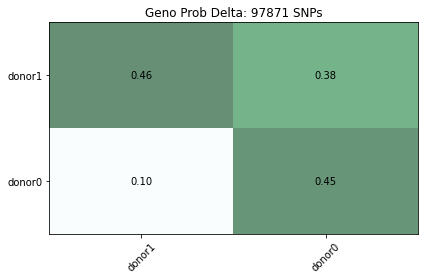

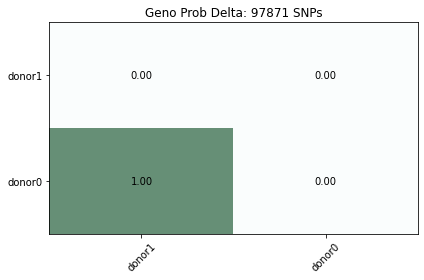

In [3]:
genotype = 'FX9006'
library_id = 'UA_Endo12865961'
library_id_genotyped = 'UA_Endo11460963'


# Link donors
res = vireoSNP.vcf.match_VCF_samples('/home/jovyan/vireo/out_novcf/'+library_id+'/GT_donors.vireo.vcf.gz', 
                                      '/home/jovyan/vireo/out_novcf/'+library_id_genotyped+'/GT_donors.vireo.vcf.gz',
                                     GT_tag1 = 'GT', GT_tag2='GT')


# Save data frame
results = getdataframe(res, library_id)
results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


# Plot
fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

# Donor FX1236 - lib UA_Endo12865962

In [7]:
# genotype = 'FX1236'
# library_id = 'UA_Endo12865962'
# library_id_genotyped = 'UA_Endo11596521'


# # Link donors
# res = vireoSNP.vcf.match_VCF_samples('/home/jovyan/vireo/out_novcf/'+library_id+'/GT_donors.vireo.vcf.gz', 
#                                       '/home/jovyan/vireo/out_novcf/'+library_id_genotyped+'/GT_donors.vireo.vcf.gz',
#                                      GT_tag1 = 'GT', GT_tag2='GT')


# # Save data frame
# results = getdataframe(res, library_id)
# results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


# # Plot
# fig = plt.figure()
# vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
#                           res['matched_donors1'] , 
#                           res['matched_donors2'] )
# plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
# plt.tight_layout()
# plt.show()

# fig = plt.figure()
# vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
#                           res['matched_donors1'] , 
#                           res['matched_donors2'] )
# plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
# plt.tight_layout()
# plt.show()

# Donor SE02 - libs UA_Endo12961679 & UA_Endo12961680


Shape for Geno Prob in VCF1: (12436, 2, 3)
Shape for Geno Prob in VCF2: (12436, 2, 3)
n_variants in VCF1, VCF2 and matched: 12436, 73434, 8237
aligned donors:
['donor0' 'donor1']
['donor0' 'donor1']


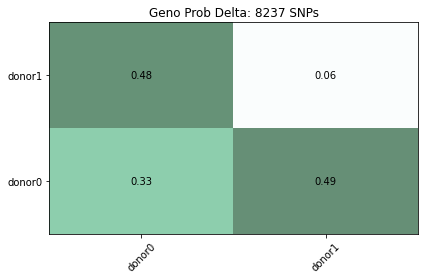

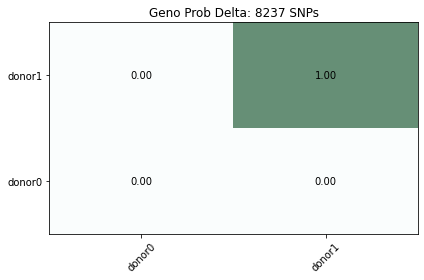

In [7]:
genotype = 'SE02'
library_id = 'UA_Endo12961679'
library_id_genotyped = 'UA_Endo13066782'


# Link donors
res = vireoSNP.vcf.match_VCF_samples('/home/jovyan/vireo/out_novcf/'+library_id+'/GT_donors.vireo.vcf.gz', 
                                      '/home/jovyan/vireo/out_novcf/'+library_id_genotyped+'/GT_donors.vireo.vcf.gz',
                                     GT_tag1 = 'GT', GT_tag2='GT')


# Save data frame
results = getdataframe(res, library_id)
results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


# Plot
fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

In [8]:
# genotype = 'SE02'
# library_id = 'UA_Endo12961679'
# library_id_genotyped = 'UA_Endo13066783'


# # Link donors
# res = vireoSNP.vcf.match_VCF_samples('/home/jovyan/vireo/out_novcf/'+library_id+'/GT_donors.vireo.vcf.gz', 
#                                       '/home/jovyan/vireo/out_novcf/'+library_id_genotyped+'/GT_donors.vireo.vcf.gz',
#                                      GT_tag1 = 'GT', GT_tag2='GT')


# # Save data frame
# results = getdataframe(res, library_id)
# results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


# # Plot
# fig = plt.figure()
# vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
#                           res['matched_donors1'] , 
#                           res['matched_donors2'] )
# plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
# plt.tight_layout()
# plt.show()

# fig = plt.figure()
# vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
#                           res['matched_donors1'] , 
#                           res['matched_donors2'] )
# plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
# plt.tight_layout()
# plt.show()

Shape for Geno Prob in VCF1: (6995, 2, 3)
Shape for Geno Prob in VCF2: (6995, 2, 3)
n_variants in VCF1, VCF2 and matched: 6995, 73434, 5176
aligned donors:
['donor0' 'donor1']
['donor0' 'donor1']


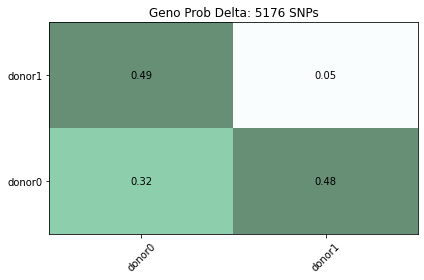

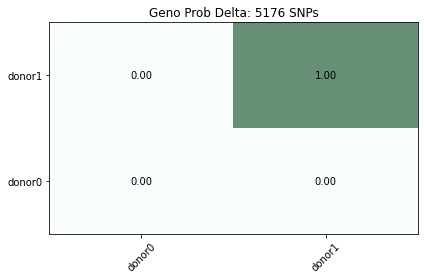

In [9]:
genotype = 'SE02'
library_id = 'UA_Endo12961680'
library_id_genotyped = 'UA_Endo13066782'


# Link donors
res = vireoSNP.vcf.match_VCF_samples('/home/jovyan/vireo/out_novcf/'+library_id+'/GT_donors.vireo.vcf.gz', 
                                      '/home/jovyan/vireo/out_novcf/'+library_id_genotyped+'/GT_donors.vireo.vcf.gz',
                                     GT_tag1 = 'GT', GT_tag2='GT')


# Save data frame
results = getdataframe(res, library_id)
results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


# Plot
fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

In [10]:
# genotype = 'SE02'
# library_id = 'UA_Endo12961680'
# library_id_genotyped = 'UA_Endo13066783'


# # Link donors
# res = vireoSNP.vcf.match_VCF_samples('/home/jovyan/vireo/out_novcf/'+library_id+'/GT_donors.vireo.vcf.gz', 
#                                       '/home/jovyan/vireo/out_novcf/'+library_id_genotyped+'/GT_donors.vireo.vcf.gz',
#                                      GT_tag1 = 'GT', GT_tag2='GT')


# # Save data frame
# results = getdataframe(res, library_id)
# results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


# # Plot
# fig = plt.figure()
# vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
#                           res['matched_donors1'] , 
#                           res['matched_donors2'] )
# plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
# plt.tight_layout()
# plt.show()

# fig = plt.figure()
# vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
#                           res['matched_donors1'] , 
#                           res['matched_donors2'] )
# plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
# plt.tight_layout()
# plt.show()

# Donor FX1289 - libs UA_Endo12961681 & UA_Endo12961682

Shape for Geno Prob in VCF1: (19831, 2, 3)
Shape for Geno Prob in VCF2: (19831, 2, 3)
n_variants in VCF1, VCF2 and matched: 19831, 73434, 12048
aligned donors:
['donor0' 'donor1']
['donor0' 'donor1']


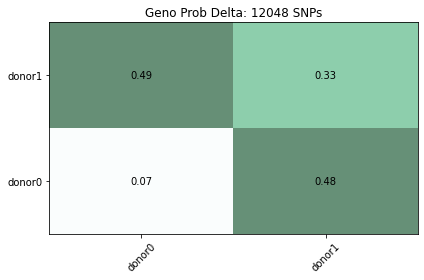

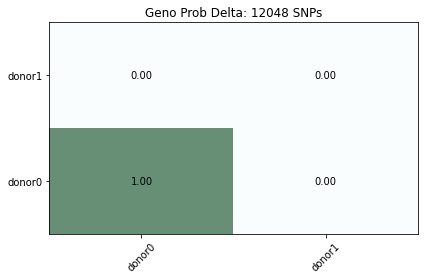

In [11]:
genotype = 'FX1289'
library_id = 'UA_Endo12961681'
library_id_genotyped = 'UA_Endo13066782'


# Link donors
res = vireoSNP.vcf.match_VCF_samples('/home/jovyan/vireo/out_novcf/'+library_id+'/GT_donors.vireo.vcf.gz', 
                                      '/home/jovyan/vireo/out_novcf/'+library_id_genotyped+'/GT_donors.vireo.vcf.gz',
                                     GT_tag1 = 'GT', GT_tag2='GT')


# Save data frame
results = getdataframe(res, library_id)
results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


# Plot
fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

In [12]:
# genotype = 'FX1289'
# library_id = 'UA_Endo12961681'
# library_id_genotyped = 'UA_Endo13066783'


# # Link donors
# res = vireoSNP.vcf.match_VCF_samples('/home/jovyan/vireo/out_novcf/'+library_id+'/GT_donors.vireo.vcf.gz', 
#                                       '/home/jovyan/vireo/out_novcf/'+library_id_genotyped+'/GT_donors.vireo.vcf.gz',
#                                      GT_tag1 = 'GT', GT_tag2='GT')


# # Save data frame
# results = getdataframe(res, library_id)
# results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


# # Plot
# fig = plt.figure()
# vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
#                           res['matched_donors1'] , 
#                           res['matched_donors2'] )
# plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
# plt.tight_layout()
# plt.show()

# fig = plt.figure()
# vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
#                           res['matched_donors1'] , 
#                           res['matched_donors2'] )
# plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
# plt.tight_layout()
# plt.show()

Shape for Geno Prob in VCF1: (12875, 2, 3)
Shape for Geno Prob in VCF2: (12875, 2, 3)
n_variants in VCF1, VCF2 and matched: 12875, 73434, 8959
aligned donors:
['donor0' 'donor1']
['donor1' 'donor0']


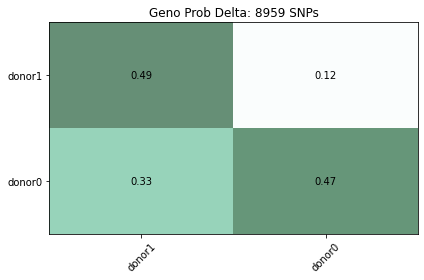

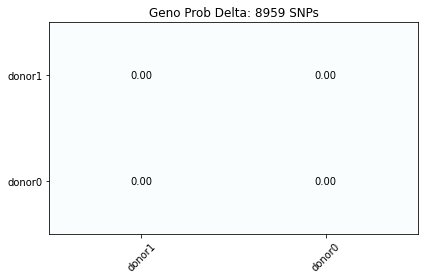

In [13]:
genotype = 'FX1289'
library_id = 'UA_Endo12961682'
library_id_genotyped = 'UA_Endo13066782'


# Link donors
res = vireoSNP.vcf.match_VCF_samples('/home/jovyan/vireo/out_novcf/'+library_id+'/GT_donors.vireo.vcf.gz', 
                                      '/home/jovyan/vireo/out_novcf/'+library_id_genotyped+'/GT_donors.vireo.vcf.gz',
                                     GT_tag1 = 'GT', GT_tag2='GT')


# Save data frame
results = getdataframe(res, library_id)
results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


# Plot
fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

fig = plt.figure()
vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
                          res['matched_donors1'] , 
                          res['matched_donors2'] )
plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
plt.tight_layout()
plt.show()

In [14]:
# genotype = 'FX1289'
# library_id = 'UA_Endo12961682'
# library_id_genotyped = 'UA_Endo13066783'


# # Link donors
# res = vireoSNP.vcf.match_VCF_samples('/home/jovyan/vireo/out_novcf/'+library_id+'/GT_donors.vireo.vcf.gz', 
#                                       '/home/jovyan/vireo/out_novcf/'+library_id_genotyped+'/GT_donors.vireo.vcf.gz',
#                                      GT_tag1 = 'GT', GT_tag2='GT')


# # Save data frame
# results = getdataframe(res, library_id)
# results.to_csv('~/vireo/donor_assignements/'+library_id+'_donor_assignement.csv')


# # Plot
# fig = plt.figure()
# vireoSNP.plot.heat_matrix(res['matched_GPb_diff'], 
#                           res['matched_donors1'] , 
#                           res['matched_donors2'] )
# plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
# plt.tight_layout()
# plt.show()

# fig = plt.figure()
# vireoSNP.plot.heat_matrix(res['matched_GPb_diff'] < 0.11, 
#                           res['matched_donors1'] , 
#                           res['matched_donors2'] )
# plt.title("Geno Prob Delta: %d SNPs" %(res['matched_n_var']))
# plt.tight_layout()
# plt.show()